In [20]:
# noinspection PyUnresolvedReferences
import cv2 as cv #OpenCV
import numpy as np #Для работы с массивами
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt #Для отображения изоюражений

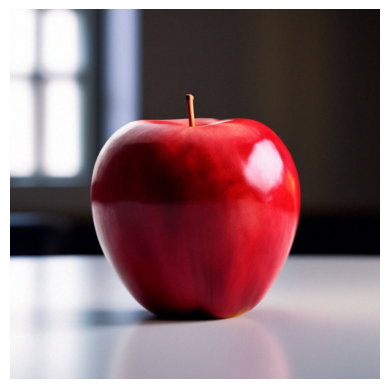

In [21]:
appleImage = cv.cvtColor(cv.imread('apple.jpg'), cv.COLOR_BGR2RGB)
plt.axis('off') #Скрывает оси
plt.imshow(appleImage) #Отобразить изображение
plt.show() #Вывести ихображение


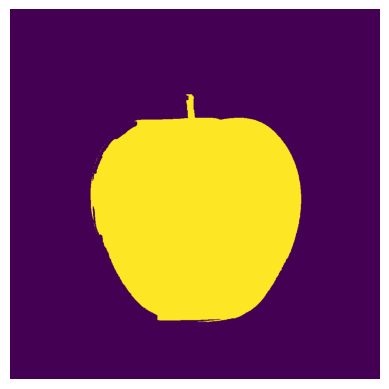

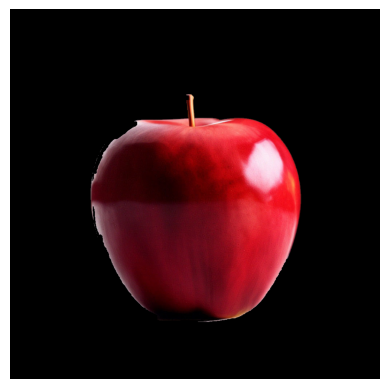

In [22]:
#GrabCut
appleMask = np.zeros(appleImage.shape[:2], np.uint8) #Создается путсая маска, размер как у изображения, но без цветового канала (uint8 - 0 - 255)
bgdModel = np.zeros((1,65), np.float64) #Массив нужный для работы GrabCut. Модель фона
fgdModel = np.zeros((1,65), np.float64)#Массив нужный для работы GrabCut. 65 - внутренний размер модели. Модель объекта

rect = (217, 226, 590, 640) #(x, y, width, height) - область, где находится объект, подобрать вручную
cv.grabCut(appleImage, appleMask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT) #5 - кол-во итераций, режим инициализации
appleMask2 = np.where((appleMask==2)|(appleMask==0),0,1).astype('uint8')# маска содержит значения где 0 - точно фон, 1 - точно объект, 2 - вероятно фон, 3 - вероятно объект. Если пиксель: 0 или 2 → делаем 0 (фон) иначе → 1 (объект)
resultAppleImage = appleImage*appleMask2[:,:,np.newaxis] # Добавляет 3 измерение, чтобы совпало с RGB. Затем происходит поэлементное умножение
plt.axis("off"); plt.imshow(appleMask2); plt.show()
plt.axis("off"); plt.imshow(resultAppleImage); plt.show()

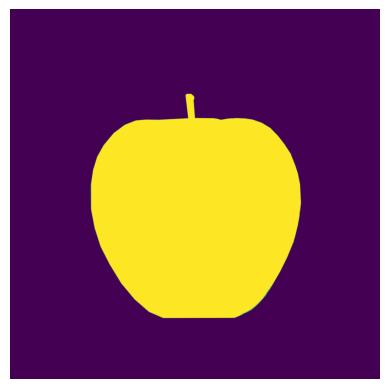

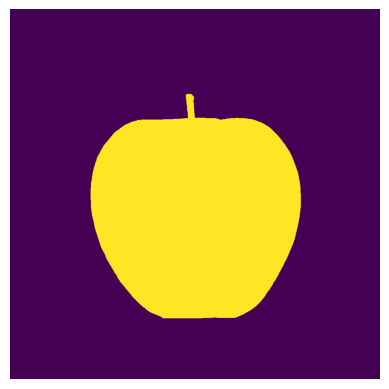

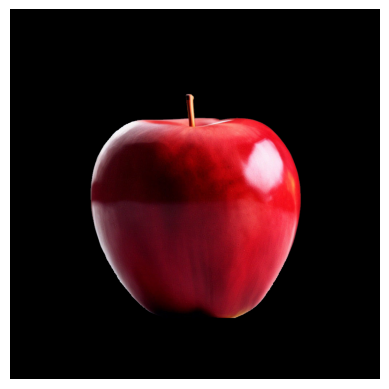

In [23]:
newAppleMask = cv.imread('apple_mask.png', cv.IMREAD_GRAYSCALE) #тут заранее подготовленная маска бинарная с черным фоном и белым объектом
appleMask[newAppleMask==0] = 0
appleMask[newAppleMask==255] = 1
appleMask, bgdModel, fgdModel = cv.grabCut(appleImage, appleMask, None, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_MASK) #Инициализация по маске, а не по прямоугольнику
appleMask = np.where((appleMask == 2)|(appleMask == 0), 0, 1).astype('uint8')
appleMask = (appleMask*255).astype('uint8')
resultAppleImage = cv.bitwise_and(appleImage, appleImage, mask=appleMask) #?
plt.axis("off"); plt.imshow(newAppleMask); plt.show()
plt.axis("off"); plt.imshow(appleMask); plt.show()
plt.axis("off"); plt.imshow(resultAppleImage); plt.show()

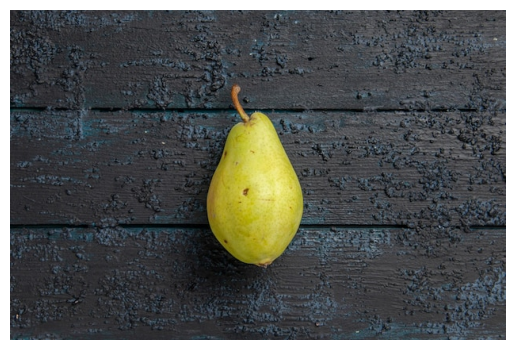

In [24]:
pearImage = cv.cvtColor(cv.imread('pear.jpg'), cv.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(pearImage)
plt.show()

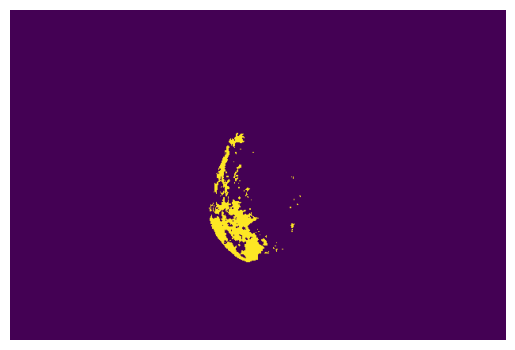

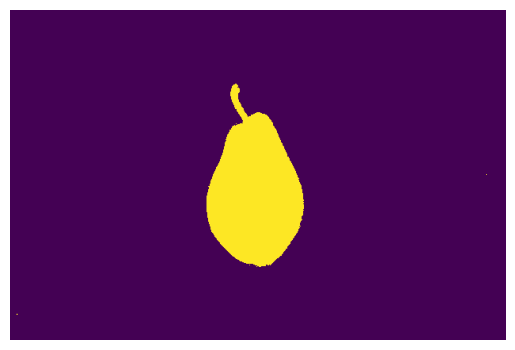

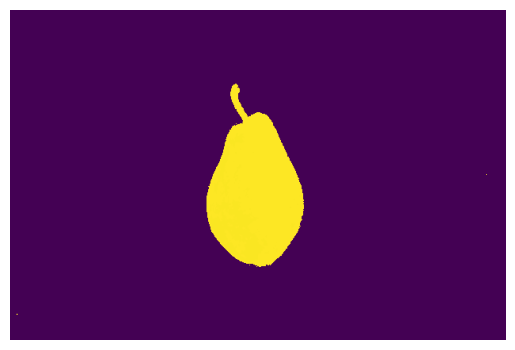

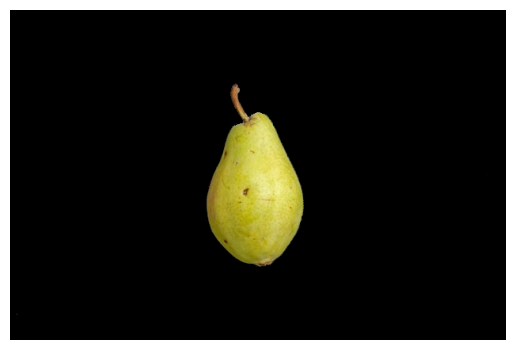

In [25]:
pearImageHSV = cv.cvtColor(pearImage, cv.COLOR_BGR2HSV) # Сегментация груши по цвету
lowerYellow = (10,200,90) #Подбираем вручную
upperYellow = (100,255,190) #Подбираем вручную
lowerGreen = (39, 78, 30) #Подбираем вручную
upperGreen = (255,255,255) #Подбираем вручную
pearYellowMask = cv.inRange(pearImageHSV, lowerYellow, upperYellow) #Возвращает маску по цветовому диапазону
pearGreenMask = cv.inRange(pearImageHSV, lowerGreen, upperGreen)
pearYellowGreenMask = pearYellowMask + pearGreenMask
resultPearImage = cv.bitwise_and(pearImage, pearImage, mask=pearYellowGreenMask)

plt.axis("off"); plt.imshow(pearYellowMask); plt.show()
plt.axis("off"); plt.imshow(pearGreenMask); plt.show()
plt.axis("off"); plt.imshow(pearYellowGreenMask); plt.show()
plt.axis("off"); plt.imshow(resultPearImage); plt.show()

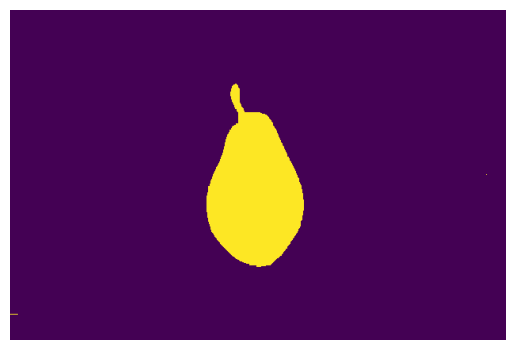

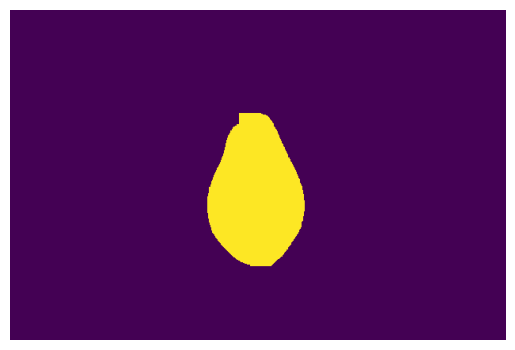

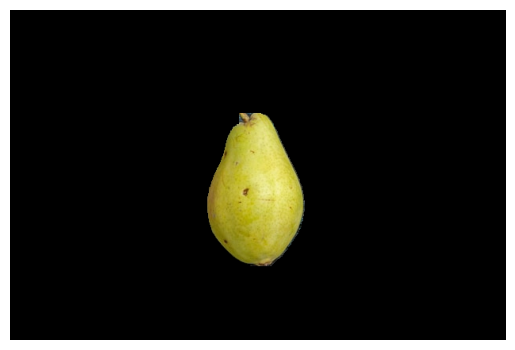

In [26]:
#Добавление морфологии
closingKernel = np.ones((13, 25), np.uint8) # Создание структуры элемента
openKernel = np.ones((10, 20), np.uint8)
pearClosingMask = cv.morphologyEx(pearYellowGreenMask, cv.MORPH_CLOSE, closingKernel) #"Закрываем дырки"
pearResultMask = cv.morphologyEx(pearClosingMask, cv.MORPH_OPEN, openKernel) #"Убираем шум"
resultPearImage = cv.bitwise_and(pearImage, pearImage, mask=pearResultMask)
plt.axis("off"); plt.imshow(pearClosingMask); plt.show()
plt.axis("off"); plt.imshow(pearResultMask); plt.show()
plt.axis("off"); plt.imshow(resultPearImage); plt.show()

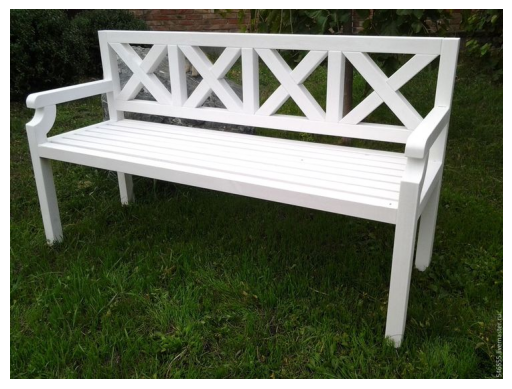

In [27]:
benchImage = cv.cvtColor(cv.imread('bench.jpg'), cv.COLOR_BGR2RGB) #Перевод в серый цвет
plt.axis("off")
plt.imshow(benchImage)
plt.show()

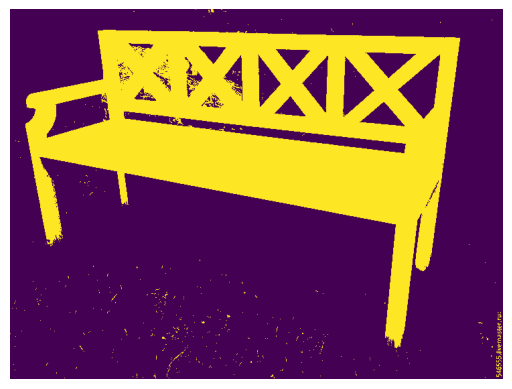

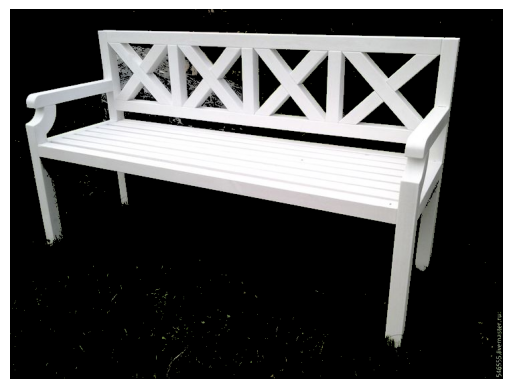

In [30]:
#Бинарная маска
grayBenchImage = cv.cvtColor(benchImage, cv.COLOR_RGB2GRAY)
_, benchMask = cv.threshold(grayBenchImage, 100, 255, cv.THRESH_BINARY)#100 - порог, 255 - значение если выше порога, инверсия. Если пиксель > 100 -> 0
plt.axis("off"); plt.imshow(benchMask); plt.show()
resultBenchImage = cv.bitwise_and(benchImage, benchImage, mask=benchMask)
plt.axis("off"); plt.imshow(resultBenchImage); plt.show()

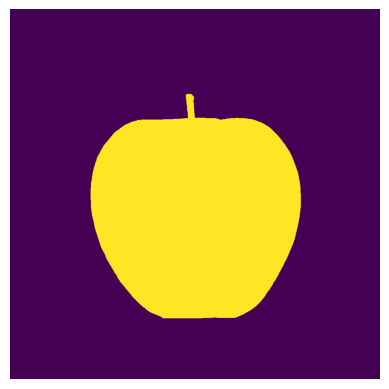

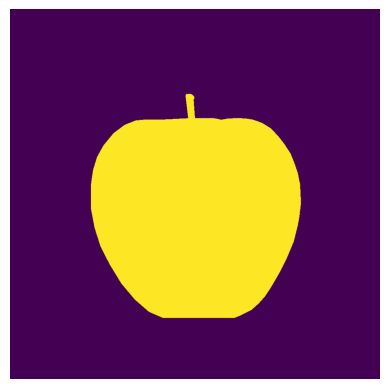

Коэффициент Дайса для яблока: 0.9983589641353365


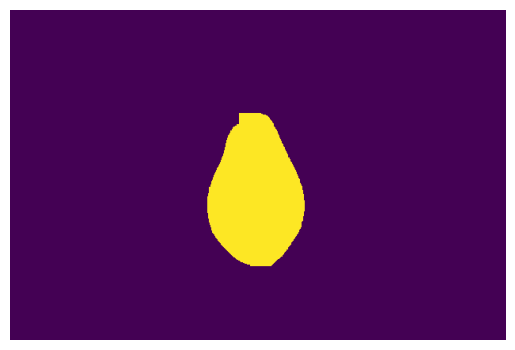

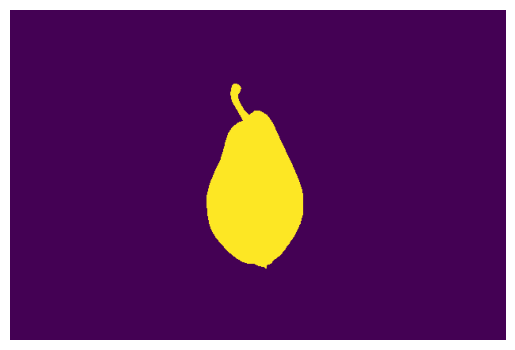

Коэффициент Дайса для груши: 0.9726915065956955


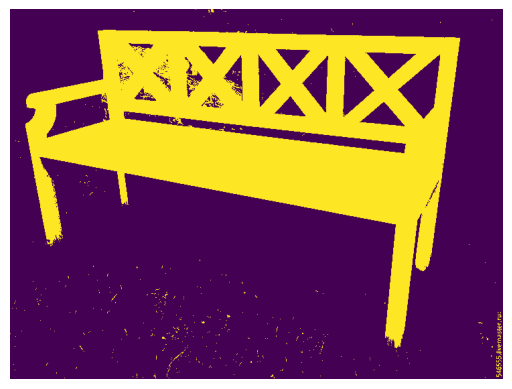

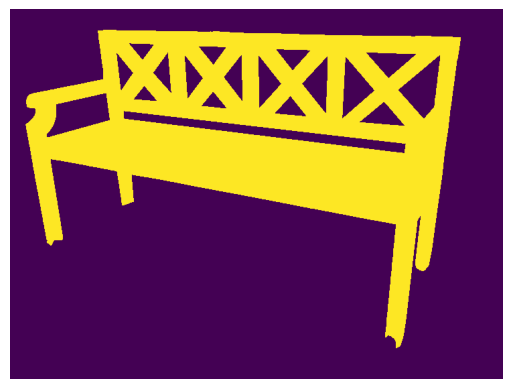

Коэффициент Дайса для лавочки: 0.9769708918645089


In [32]:
#В функцию
manualAppleMask = cv.imread("apple_mask.png", cv.IMREAD_GRAYSCALE)
_, manualAppleMask = cv.threshold(manualAppleMask, 127, 255, cv.THRESH_BINARY)
intersectionApple = np.sum((appleMask == 255) & (manualAppleMask == 255))
appleDice = 2.0 * intersectionApple / (np.sum(appleMask == 255) + np.sum(manualAppleMask == 255))
plt.axis("off"); plt.imshow(appleMask); plt.show()
plt.axis("off"); plt.imshow(manualAppleMask); plt.show()
print("Коэффициент Дайса для яблока:", appleDice)

manualPearMask = cv.imread("pear_mask.png", cv.IMREAD_GRAYSCALE)
_, manualPearMask = cv.threshold(manualPearMask, 127, 255, cv.THRESH_BINARY)
intersectionPear = np.sum((pearResultMask == 255) & (manualPearMask == 255))
pearDice = 2.0 * intersectionPear / (np.sum(pearResultMask == 255) + np.sum(manualPearMask == 255))
plt.axis("off"); plt.imshow(pearResultMask); plt.show()
plt.axis("off"); plt.imshow(manualPearMask); plt.show()
print("Коэффициент Дайса для груши:", pearDice)

manualBenchMask = cv.imread("bench_mask.png", cv.IMREAD_GRAYSCALE)
_, manualBenchMask = cv.threshold(manualBenchMask, 127, 255, cv.THRESH_BINARY)
intersectionBench = np.sum((benchMask == 255) & (manualBenchMask == 255))
benchDice = 2.0 * intersectionBench / (np.sum(benchMask == 255) + np.sum(manualBenchMask == 255))
plt.axis("off"); plt.imshow(benchMask); plt.show()
plt.axis("off"); plt.imshow(manualBenchMask); plt.show()
print("Коэффициент Дайса для лавочки:", benchDice)
